**Problem statement**
Improve and support the speed and quality of the oenologist's wine evaluations, by designing a model that can predict the type of plant variety of a wine given the chemical measurements. Certification: Quality evaluation is often part of the certification process and can be used to improve wine making (by
identifying the most influential factors) and to stratify wines such as premium brands (useful for setting prices).

Methods used:
NNs: Neural Network (number of NN hidden nodes)
SVM: support vector machines (hyperparameter svm kernel)
MR:  linear/multiple regression (MR): classic approach
'''



### Initial set-up

In [61]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sb


wine = load_wine()


In [62]:
print("Keys \n",wine.keys())
print("\n")
print("Amount of records/Number of Columns:", (wine.data.shape))
print("\n")
print("Features\n")
for name in wine.feature_names:
    print(name)
print("\n")
print("DESCR: \n{}".format(wine['DESCR'][:2000]))
print("\n")
print(type(wine.data))

Keys 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


Amount of records/Number of Columns: (178, 13)


Features

alcohol
malic_acid
ash
alcalinity_of_ash
magnesium
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines
proline


DESCR: 
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD


**Conclusions**
1. no missing attribute values / null values
2. Classes count differ between class_0 (59), class_1(71), class_2(48) records. 
3. Difficult to estimate if this is not balanced, since there is no reference. If its imbalanced that will influence the training of the model.
4. Type is a Numpy ndArray

### Data Exploration

In [63]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [64]:
#np.c_ is used to concatenate
wine_df = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns= wine['feature_names']+['target_value'])

In [ ]:
wine_df.info(),wine_df.describe()
wine_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target_value'],
      dtype='object')

**Notes**
1. magnesium probably has an outliers causing the high stdev. Starting from min through the percentages it rapidly increases towards the max
2. proline probably has an few outliers towards max causing a higher stdev
3. difficult to estimate the weight of increasing numbers/stdev since we dont know what is standard. For instance ProAnthocyanis is sometimes moving > 1.00 instead of 0.40. Domain expertise is missing to judge the impact directly


In [66]:
#plt.hist(wine_df[['alcohol', 'magnesium', 'proline']],bins=30, figsize=(10, 6), alpha=0.6,edgecolor='Black',)
#plt.show()

columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash','ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols',
           'proanthocyanins', 'color_intensity', 'hue','od280/od315_of_diluted_wines', 'proline']

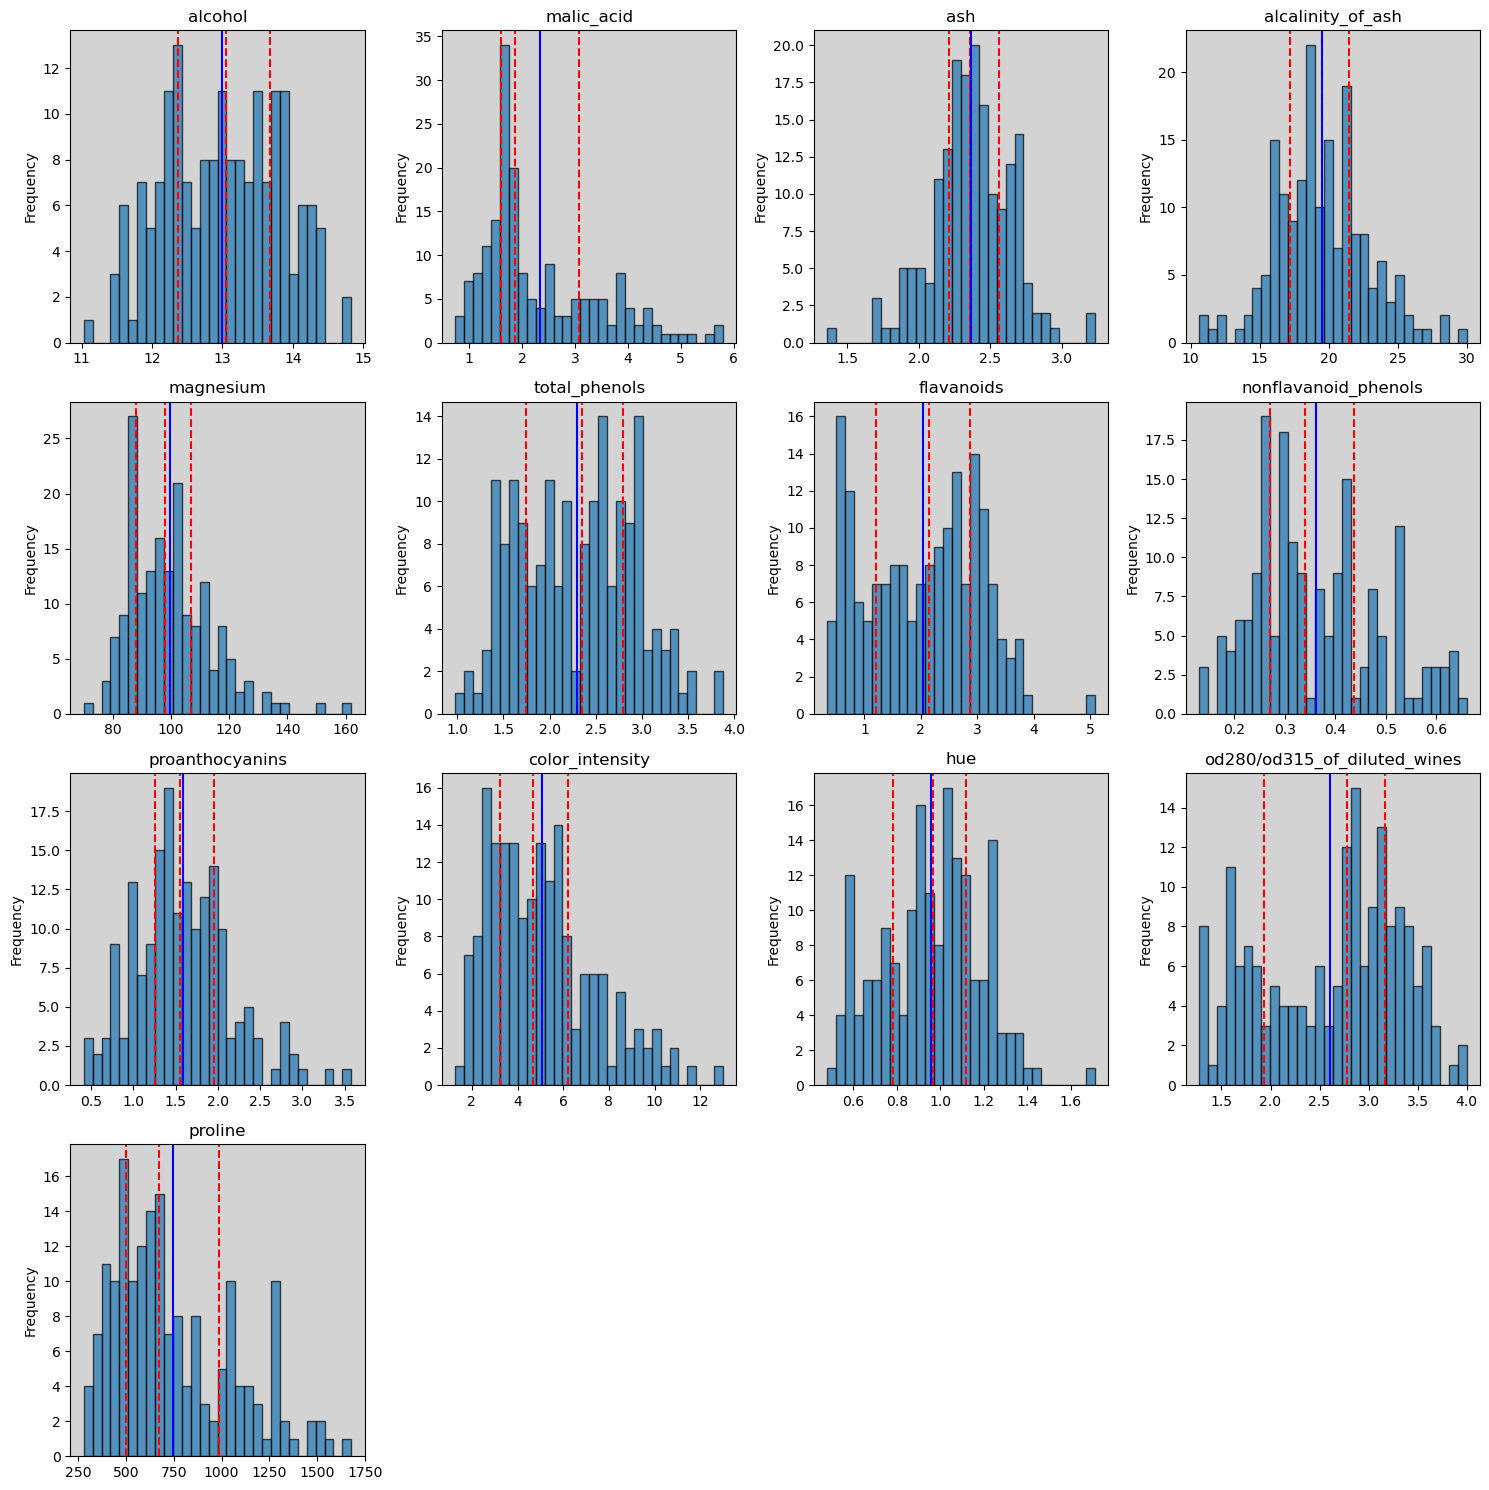

In [ ]:

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

columns_to_plot = [col for col in wine_df.columns if col != 'target_value']

# Plot histograms and set titles
for i, column in enumerate(columns_to_plot):
    axes[i].hist(wine_df[column], bins=30, edgecolor='black', alpha=0.7)
    q25 = wine_df[column].quantile(0.25)
    q50 = wine_df[column].quantile(0.50)
    q75 = wine_df[column].quantile(0.75)
    mean = wine_df[column].mean()
    median = wine_df[column].median()

    #mode = wine_df[column].mode()
    axes[i].set_title(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_facecolor('lightgrey')
    axes[i].axvline(q25, color='Red', linestyle='dashed', linewidth=1.5, label='25th Percentile')
    axes[i].axvline(q50, color='Red', linestyle='dashed', linewidth=1.5, label='50th Percentile')
    axes[i].axvline(q75, color='Red', linestyle='dashed', linewidth=1.5, label='75th Percentile')
    axes[i].axvline(mean, color='Blue', linestyle='solid', linewidth=1.5, label='Mean')
    #axes[i].axvline(median, color='Cyan', linestyle='solid', linewidth=1.5, label='Median')
    #axes[i].axvline(mode, color='Green', linestyle='solid', linewidth=1, label='Mode')


for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()


#### Notes: Distribution
- distribution looks fine, with some exceptions of outliers
- some skewed features (melid_acid, proline)
- skewness of magnesium caused by a few outliers

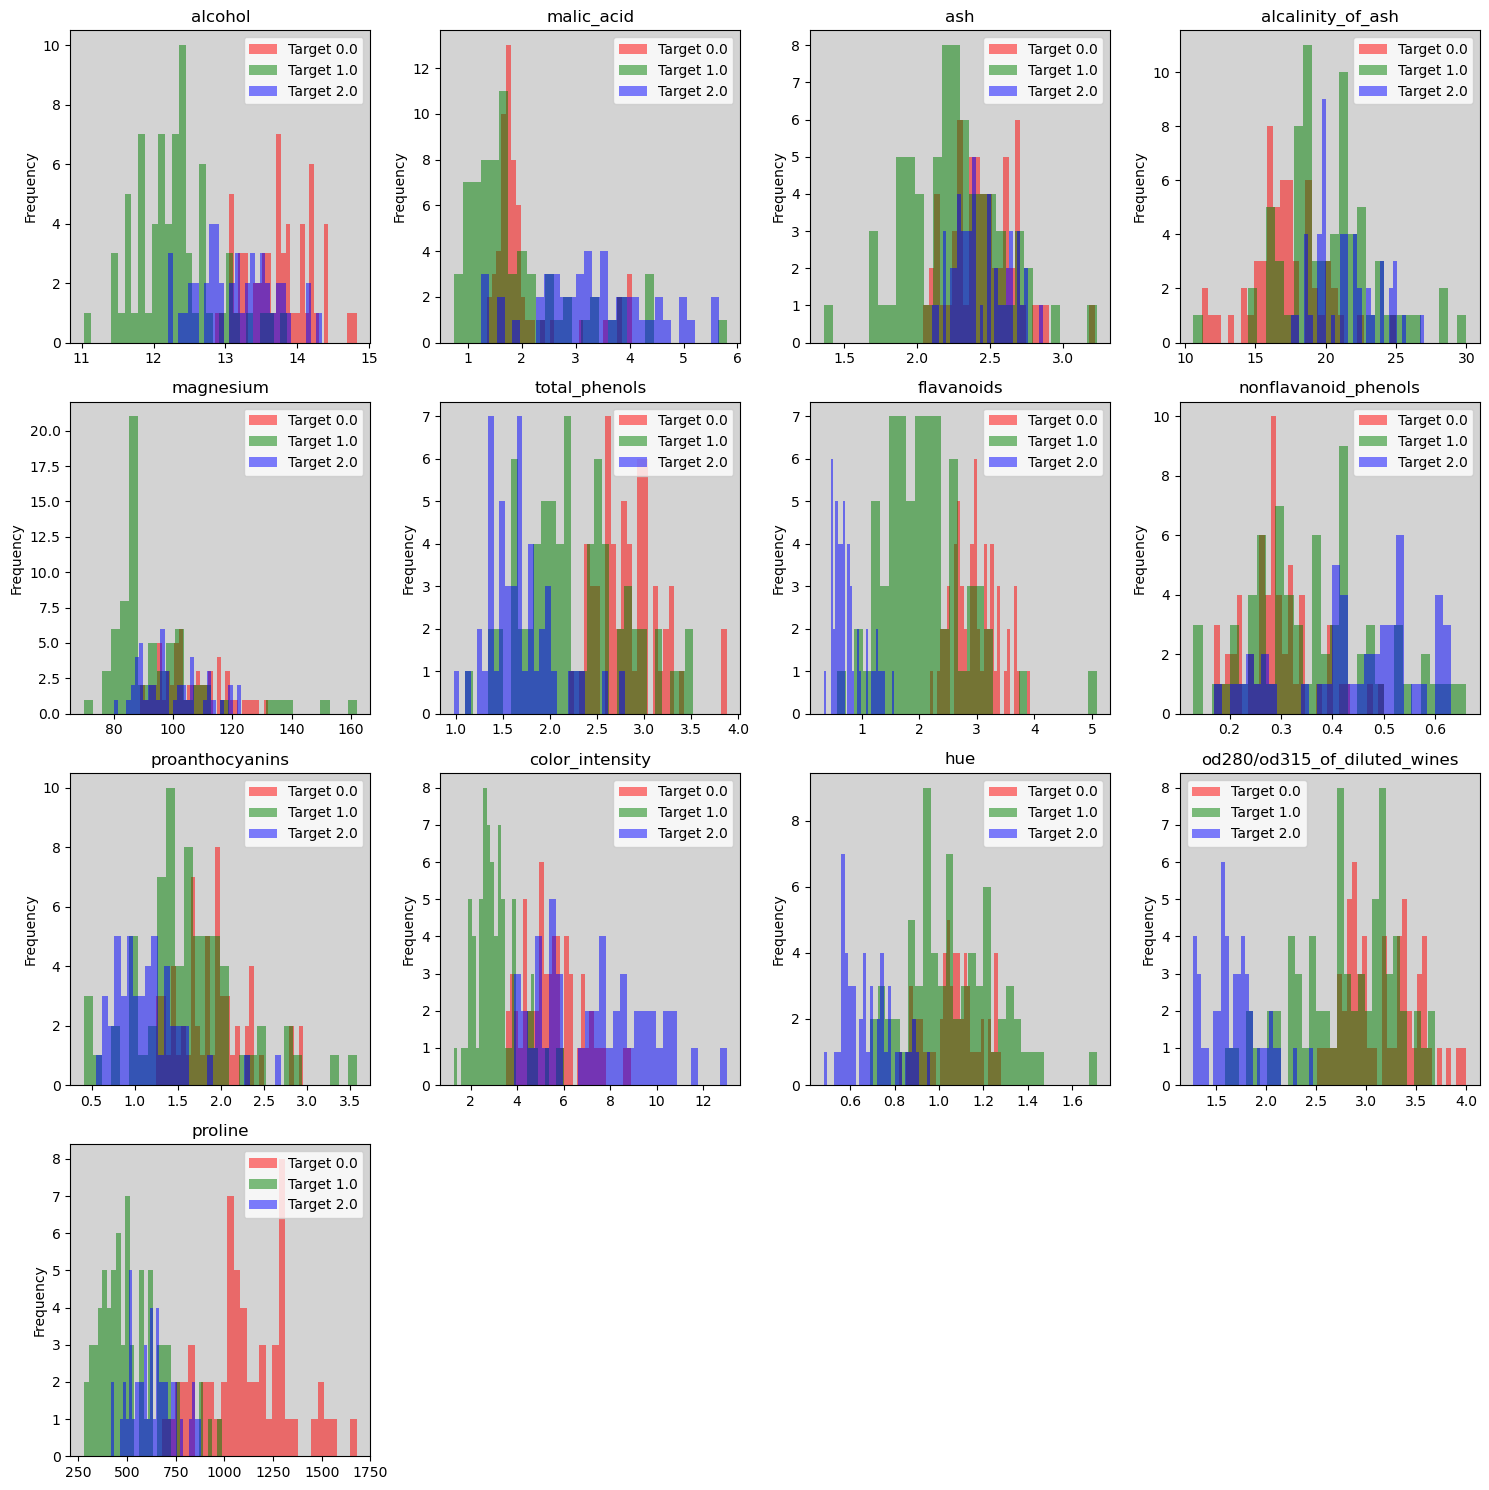

In [68]:
# Create subplots with classes
target_classes = wine_df['target_value'].unique()
colors = dict(zip(target_classes, ['red', 'green', 'blue']))

# Define columns to plot (excluding 'target_value')
columns_to_plot = [col for col in wine_df.columns if col != 'target_value']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

# Plot histograms for each feature grouped by target_value
for i, column in enumerate(columns_to_plot):
    for target in target_classes:
        subset = wine_df[wine_df['target_value'] == target]
        axes[i].hist(subset[column], bins=30, alpha=0.5, label=f'Target {target}', color=colors[target])
    
    axes[i].set_title(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_facecolor('lightgrey')
    axes[i].legend()

# Turn off unused subplots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#### Notes: Histogram
- magnesium has some outliers which cause the high deviation. One value seems to be mainly represented in target 1 (80/90). Rest is devided oke.
- proline has good seperation between target 0 and target 1. target 2 is overlapping
- flavanoids seems to be seperated between the target values. 
- melid acid skewness is mostly caused by target 0

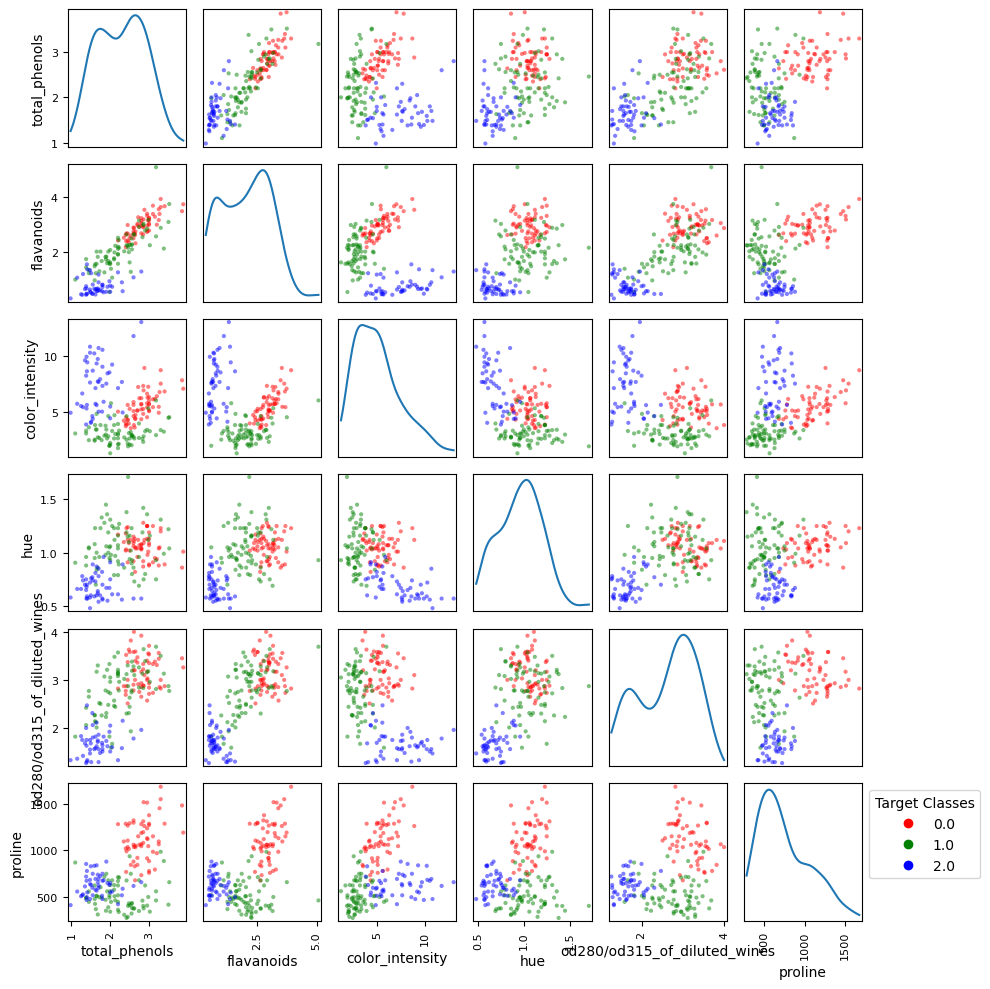

In [69]:
# Create subplots with classes
target_classes = wine_df['target_value'].unique()
colors = dict(zip(target_classes, ['red', 'green', 'blue']))

# Define columns to plot (excluding 'target_value')
columns_to_plot = [col for col in wine_df.columns if col in ('od280/od315_of_diluted_wines','hue','flavanoids','melid acid','proline','color_intensity','total_phenols')]

# Map colors to each row based on target_value
color_list = wine_df['target_value'].map(colors)

sm = scatter_matrix(wine_df[columns_to_plot], figsize=(10, 10), diagonal='kde', color=color_list)

handles = [plt.Line2D([], [], marker='o', color=color, linestyle='', label=str(cls)) for cls, color in colors.items()]
plt.legend(handles=handles, title='Target Classes', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()


#### Notes: ScatterMatrix
- proline shows clustering promise mostly with color intensity and flavanoids / flavanoids and proline
- flavanoids shows clustering promise mostly with alcohol, magnesium and proline.

In [70]:
wine_df_class = wine_df[wine_df['target_value'] != 1]
wine_df_class['target_value'].value_counts()


target_value
0.0    59
2.0    48
Name: count, dtype: int64

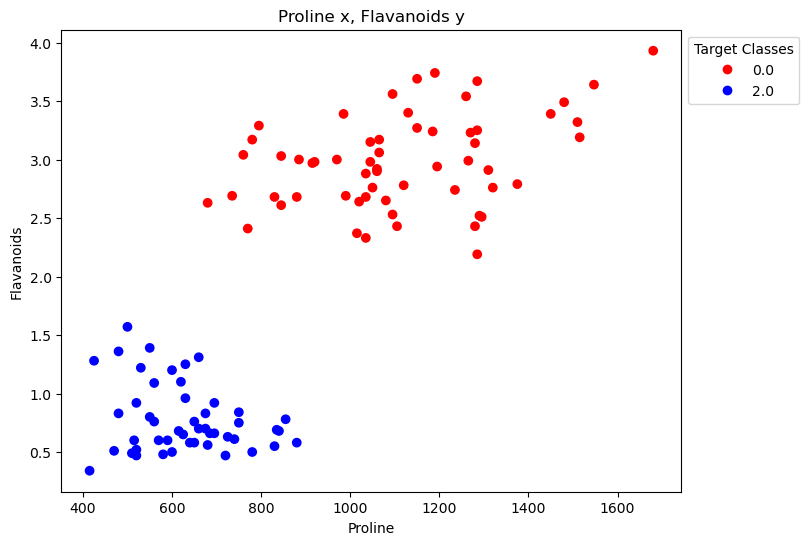

In [71]:
# Plot the data points
target_classes = wine_df_class['target_value'].unique()
colors = dict(zip(target_classes, ['red', 'Blue',]))
color_list = wine_df_class['target_value'].map(colors)

plt.figure(figsize =(8, 6))
scatter = plt.scatter(
wine_df_class['proline'],
wine_df_class['flavanoids'], 
c=color_list, 
marker='o'
)

# Set axis labels
plt.xlabel('Proline')
plt.ylabel('Flavanoids')

# Set plot title
plt.title('Proline x, Flavanoids y')

handles = [plt.Line2D([], [], marker='o', color=color, linestyle='', label=str(cls)) for cls, color in colors.items()]
plt.legend(handles=handles, title='Target Classes', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


#### Notes: Scatterplot 2 features
-   clear difference in classes, its linear seperatable.
-   we didnt do any scaling work so its hard to say if other features are not optional for linear corrolation

In [72]:
corr_matrix = wine_df_class.corr(numeric_only=True)
corr_matrix["flavanoids"].sort_values(ascending=False)

flavanoids                      1.000000
total_phenols                   0.908321
od280/od315_of_diluted_wines    0.849363
proline                         0.805336
hue                             0.797715
proanthocyanins                 0.752475
alcohol                         0.561319
magnesium                       0.382890
ash                             0.055456
color_intensity                -0.307120
malic_acid                     -0.623283
alcalinity_of_ash              -0.661119
nonflavanoid_phenols           -0.678038
target_value                   -0.952140
Name: flavanoids, dtype: float64

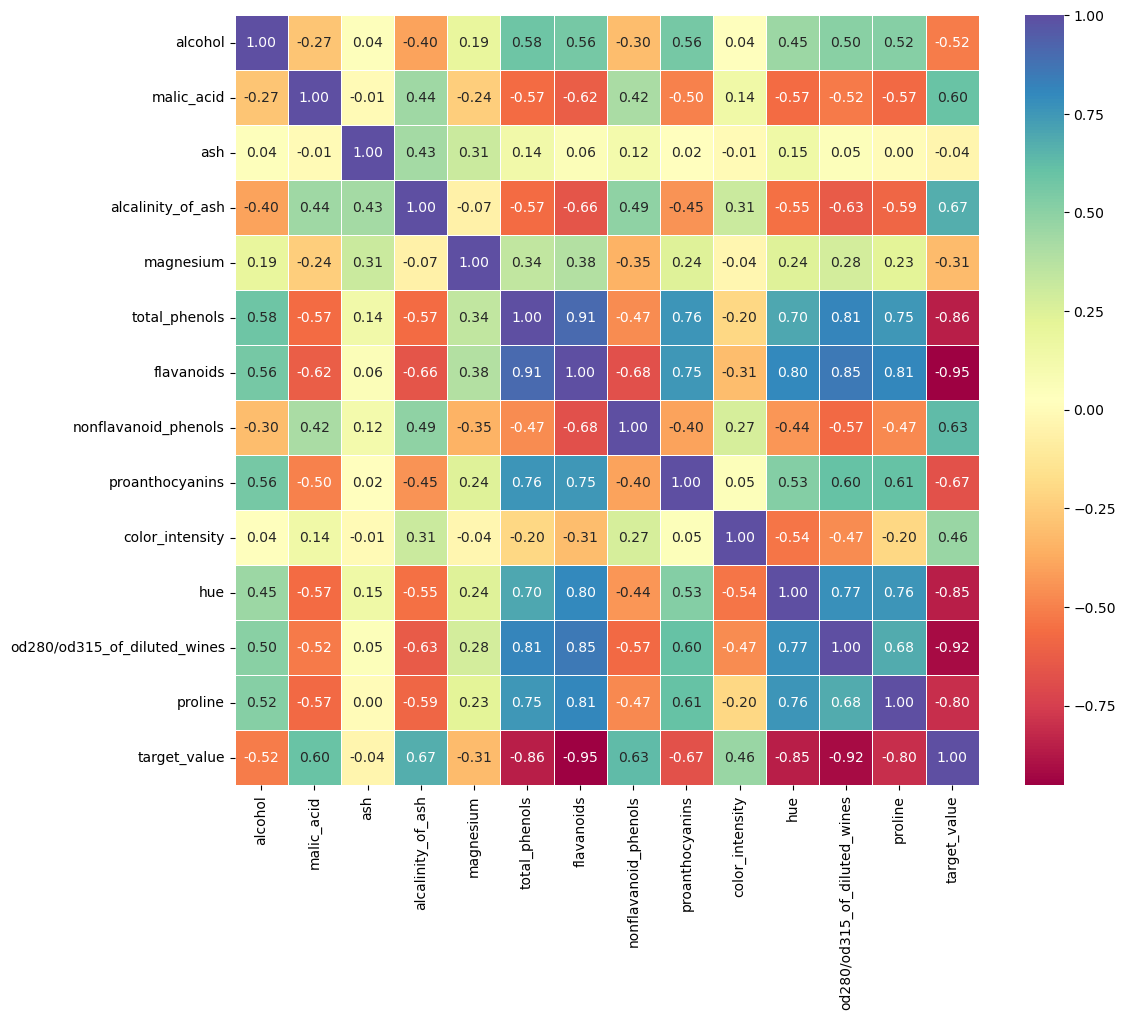

In [73]:
plt.figure(figsize=(12, 10))
hm = sb.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)


What are the rules in corrolation again? 
Two features whom are linear corrolated are oke or not oke?
Focus on corrolation with the target_value?


flavanoids, od280/od315_of_diluted_wines, hue, proline, total_phenols 

### Train Test Datasets 

### Feature Scaling

### Model Training (load)

### Cross Validation